## Health Risk Prediction & Lifestyle Analysis

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage


In [26]:



# Heart Disease dataset
try:
    df_heart = pd.read_csv('heart.csv')
    print("\nHeart Disease Dataset loaded successfully.")
except FileNotFoundError:
    print("\nError: 'heart_disease.csv' not found. Creating a dummy dataset.")
    data = {
        'age': np.random.randint(20, 80, 100), 'sex': np.random.choice([0, 1], 100),
        'chol': np.random.randint(100, 400, 100), 'trestbps': np.random.randint(90, 200, 100),
        'thalach': np.random.randint(80, 200, 100), 'fbs': np.random.choice([0, 1], 100),
        'exang': np.random.choice([0, 1], 100), 'oldpeak': np.random.rand(100) * 5,
        'target': np.random.choice([0, 1], 100)
    }
    df_heart = pd.DataFrame(data)



Heart Disease Dataset loaded successfully.


In [27]:

print(df_heart.info())
print("\n--- Heart Disease Descriptive Statistics ---")
print(df_heart.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

--- Heart Disease Descriptive Statistics ---
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146 

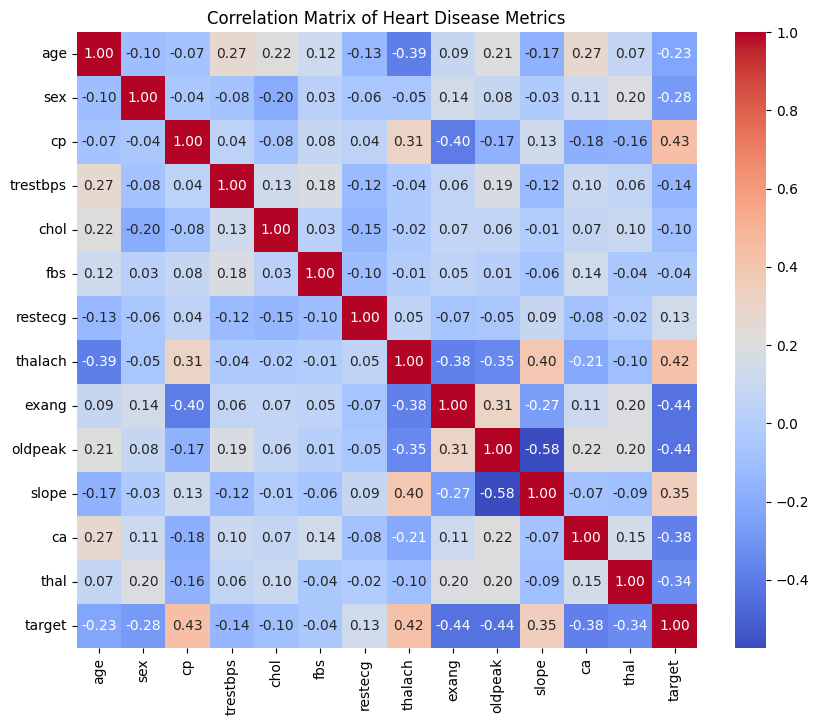

In [28]:
numerical_features_heart = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak']
scaler = StandardScaler()
df_heart[numerical_features_heart] = scaler.fit_transform(df_heart[numerical_features_heart])


plt.figure(figsize=(10, 8))
sns.heatmap(df_heart.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Heart Disease Metrics')
plt.show()


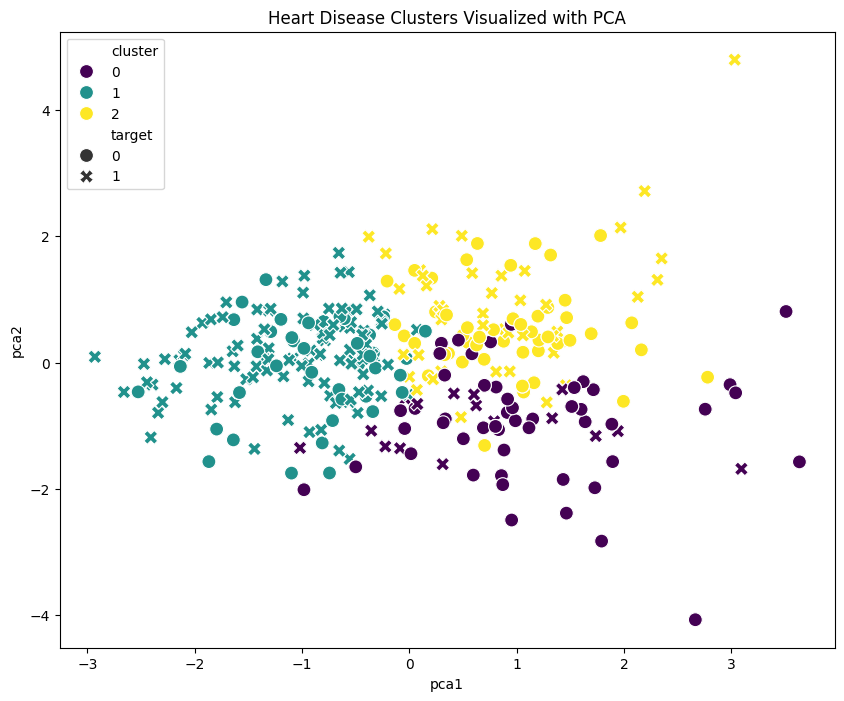

In [29]:

clustering_features_heart = ['age', 'chol', 'trestbps', 'oldpeak']
X_cluster_heart = df_heart[clustering_features_heart]
kmeans_model = KMeans(n_clusters=3, random_state=42, n_init=10)
df_heart['cluster'] = kmeans_model.fit_predict(X_cluster_heart)

pca = PCA(n_components=2)
X_pca_heart = pca.fit_transform(X_cluster_heart)
df_heart['pca1'] = X_pca_heart[:, 0]
df_heart['pca2'] = X_pca_heart[:, 1]
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df_heart, palette='viridis', style='target', s=100)
plt.title('Heart Disease Clusters Visualized with PCA')
plt.show()


In [30]:
try:
    df_pima = pd.read_csv('diabetes.csv')
    print("\nPima Indians Diabetes Dataset loaded successfully.")
except FileNotFoundError:
    print("\nError: 'diabetes.csv' not found. Creating a dummy dataset.")
    data_pima = {
        'Pregnancies': np.random.randint(0, 10, 100),
        'Glucose': np.random.randint(40, 200, 100),
        'BloodPressure': np.random.randint(40, 120, 100),
        'SkinThickness': np.random.randint(10, 60, 100),
        'Insulin': np.random.randint(0, 300, 100),
        'BMI': np.random.uniform(15, 50, 100),
        'DiabetesPedigreeFunction': np.random.uniform(0.1, 2.5, 100),
        'Age': np.random.randint(20, 80, 100),
        'Outcome': np.random.choice([0, 1], 100)
    }
    df_pima = pd.DataFrame(data_pima)


Pima Indians Diabetes Dataset loaded successfully.


In [31]:

print(df_pima.info())
print("\n--- Pima Diabetes Descriptive Statistics ---")
print(df_pima.describe())


features_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in features_to_impute:
    df_pima[col] = df_pima[col].replace(0, np.nan)
    df_pima[col].fillna(df_pima[col].median(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

--- Pima Diabetes Descriptive Statistics ---
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      6

C:\Users\sahib\AppData\Local\Temp\ipykernel_9240\4113100908.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pima[col].fillna(df_pima[col].median(), inplace=True)
C:\Users\sahib\AppData\Local\Temp\ipykernel_9240\4113100908.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [32]:
numerical_features_pima = df_pima.drop('Outcome', axis=1).columns.tolist()
scaler = StandardScaler()
df_pima[numerical_features_pima] = scaler.fit_transform(df_pima[numerical_features_pima])


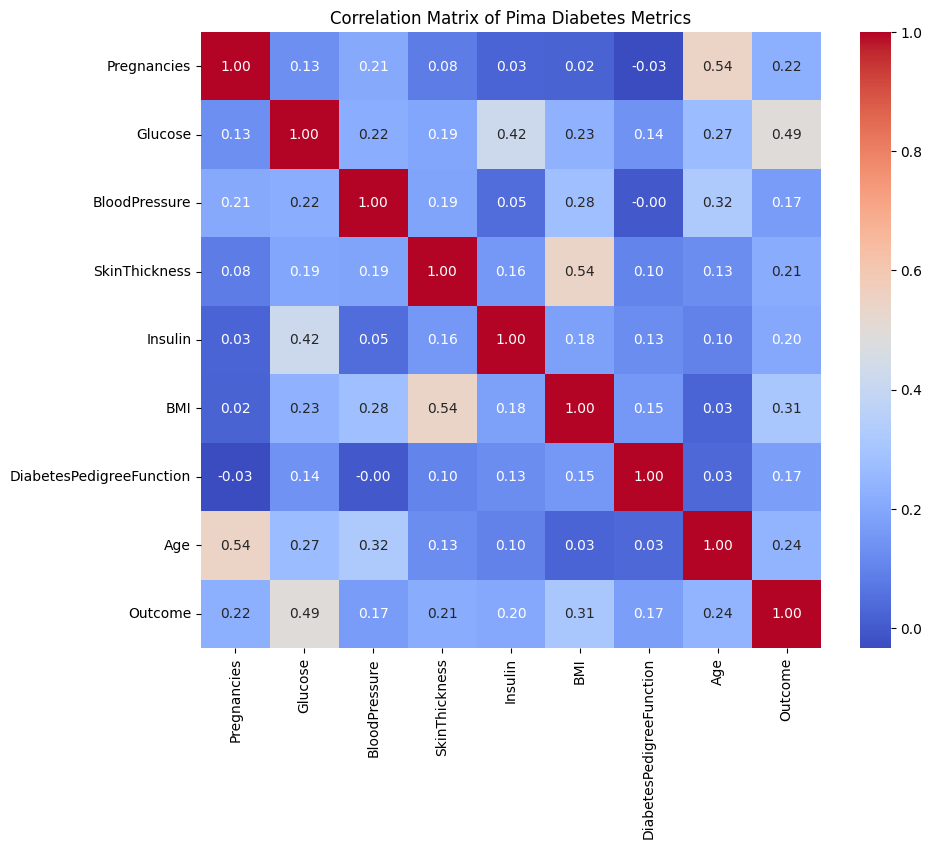

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_pima.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pima Diabetes Metrics')
plt.show()

In [34]:

X_class_pima = df_pima.drop('Outcome', axis=1)
y_class_pima = df_pima['Outcome']
X_class_train_p, X_class_test_p, y_class_train_p, y_class_test_p = train_test_split(X_class_pima, y_class_pima, test_size=0.2, random_state=42)


In [35]:

clustering_features_pima = ['Glucose', 'BMI', 'Age']
X_cluster_pima = df_pima[clustering_features_pima]


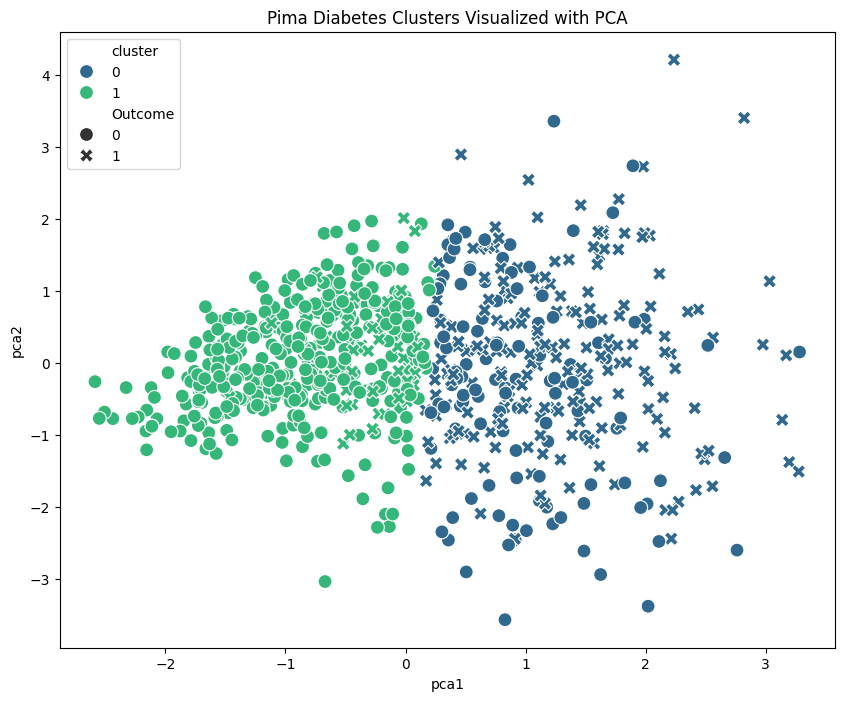

In [36]:
kmeans_model = KMeans(n_clusters=2, random_state=42, n_init=10)
df_pima['cluster'] = kmeans_model.fit_predict(X_cluster_pima)

pca = PCA(n_components=2)
X_pca_pima = pca.fit_transform(X_cluster_pima)
df_pima['pca1'] = X_pca_pima[:, 0]
df_pima['pca2'] = X_pca_pima[:, 1]
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df_pima, palette='viridis', style='Outcome', s=100)
plt.title('Pima Diabetes Clusters Visualized with PCA')
plt.show()


In [37]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    xgb_available = False

classification_models = {
    "Logistic Regression": LogisticRegression(solver="liblinear", random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(kernel="linear", random_state=42)
}

if xgb_available:
    classification_models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Prepare features and target for heart disease classification
X_class_heart = df_heart.drop('target', axis=1)
y_class_heart = df_heart['target']
X_class_train_h, X_class_test_h, y_class_train_h, y_class_test_h = train_test_split(
    X_class_heart, y_class_heart, test_size=0.2, random_state=42
)

print("🔹 Classification Model Comparison (Heart Disease Dataset)")
for name, model in classification_models.items():
    model.fit(X_class_train_h, y_class_train_h)
    y_pred = model.predict(X_class_test_h)
    acc = accuracy_score(y_class_test_h, y_pred)
    f1 = f1_score(y_class_test_h, y_pred)
    print(f"{name:20s} -> Accuracy: {acc:.4f}, F1: {f1:.4f}")


🔹 Classification Model Comparison (Heart Disease Dataset)
Logistic Regression  -> Accuracy: 0.7902, F1: 0.8072
KNN                  -> Accuracy: 0.7951, F1: 0.7981
Decision Tree        -> Accuracy: 0.9854, F1: 0.9852
Random Forest        -> Accuracy: 0.9854, F1: 0.9852
Gradient Boosting    -> Accuracy: 0.9512, F1: 0.9510
SVM                  -> Accuracy: 0.8098, F1: 0.8282
XGBoost              -> Accuracy: 0.9854, F1: 0.9852


c:\Users\sahib\Downloads\ml\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:08:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [38]:

# y_reg_train_h and y_reg_test_h are already defined in a cell below, so you can use them directly.

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

try:
    from xgboost import XGBRegressor
    xgb_available = True
except ImportError:
    xgb_available = False

regression_models = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

if xgb_available:
    regression_models["XGBoost"] = XGBRegressor(random_state=42)

print("🔹 Regression Model Comparison (Heart Disease Dataset)")
for name, model in regression_models.items():
    model.fit(X_reg_train_h, y_reg_train_h)
    y_pred = model.predict(X_reg_test_h)
    mse = mean_squared_error(y_reg_test_h, y_pred)
    r2 = r2_score(y_reg_test_h, y_pred)
    print(f"{name:20s} -> MSE: {mse:.4f}, R2: {r2:.4f}")


🔹 Regression Model Comparison (Heart Disease Dataset)
Linear Regression    -> MSE: 0.0000, R2: 1.0000
KNN Regressor        -> MSE: 0.2848, R2: 0.7787
Decision Tree        -> MSE: 0.0005, R2: 0.9996
Random Forest        -> MSE: 0.0291, R2: 0.9774
Gradient Boosting    -> MSE: 0.0056, R2: 0.9957
SVR                  -> MSE: 0.1279, R2: 0.9006
XGBoost              -> MSE: 0.0001, R2: 0.9999


 **Heart Disease Dataset - Classification Models**

### Logistic Regression ###
Accuracy: 0.7902439024390244
Precision: 0.75
Recall: 0.8737864077669902
F1 Score: 0.8071748878923767


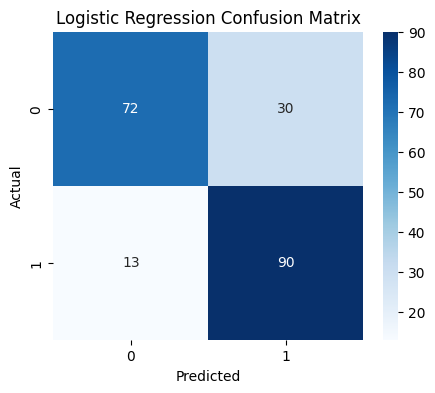

In [39]:

print("### Logistic Regression ###")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_class_train_h, y_class_train_h)
y_pred = model.predict(X_class_test_h)

print("Accuracy:", accuracy_score(y_class_test_h, y_pred))
print("Precision:", precision_score(y_class_test_h, y_pred))
print("Recall:", recall_score(y_class_test_h, y_pred))
print("F1 Score:", f1_score(y_class_test_h, y_pred))

cm = confusion_matrix(y_class_test_h, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### KNN Classifier ###
Accuracy: 0.7951219512195122
Precision: 0.7904761904761904
Recall: 0.8058252427184466
F1 Score: 0.7980769230769231


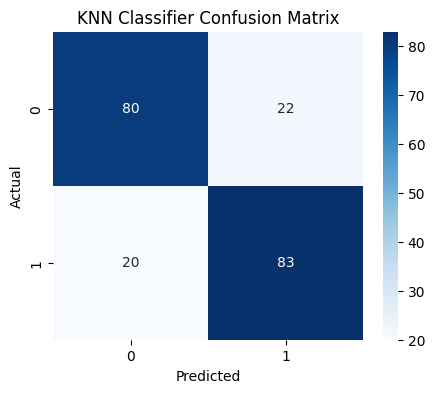

In [40]:

print("### KNN Classifier ###")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = KNeighborsClassifier()
model.fit(X_class_train_h, y_class_train_h)
y_pred = model.predict(X_class_test_h)

print("Accuracy:", accuracy_score(y_class_test_h, y_pred))
print("Precision:", precision_score(y_class_test_h, y_pred))
print("Recall:", recall_score(y_class_test_h, y_pred))
print("F1 Score:", f1_score(y_class_test_h, y_pred))

cm = confusion_matrix(y_class_test_h, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("KNN Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Decision Tree Classifier ###
Accuracy: 0.9853658536585366
Precision: 1.0
Recall: 0.970873786407767
F1 Score: 0.9852216748768473


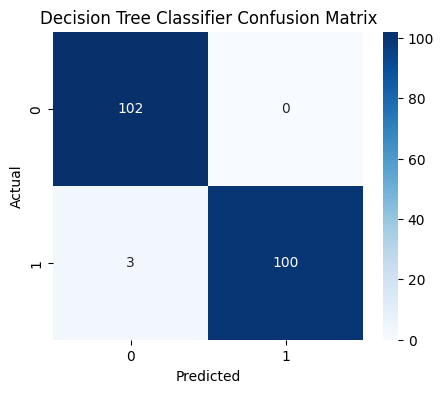

In [41]:

print("### Decision Tree Classifier ###")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(random_state=42)
model.fit(X_class_train_h, y_class_train_h)
y_pred = model.predict(X_class_test_h)

print("Accuracy:", accuracy_score(y_class_test_h, y_pred))
print("Precision:", precision_score(y_class_test_h, y_pred))
print("Recall:", recall_score(y_class_test_h, y_pred))
print("F1 Score:", f1_score(y_class_test_h, y_pred))

cm = confusion_matrix(y_class_test_h, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Random Forest Classifier ###
Accuracy: 0.9853658536585366
Precision: 1.0
Recall: 0.970873786407767
F1 Score: 0.9852216748768473


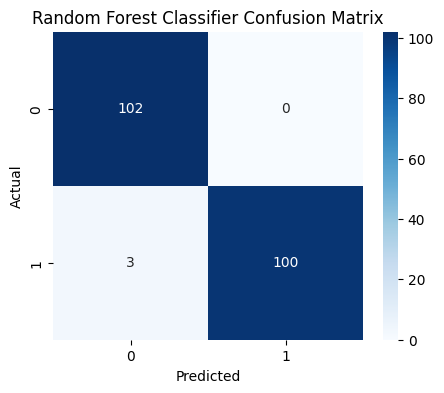

In [42]:

print("### Random Forest Classifier ###")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = RandomForestClassifier(random_state=42)
model.fit(X_class_train_h, y_class_train_h)
y_pred = model.predict(X_class_test_h)

print("Accuracy:", accuracy_score(y_class_test_h, y_pred))
print("Precision:", precision_score(y_class_test_h, y_pred))
print("Recall:", recall_score(y_class_test_h, y_pred))
print("F1 Score:", f1_score(y_class_test_h, y_pred))

cm = confusion_matrix(y_class_test_h, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Gradient Boosting Classifier ###
Accuracy: 0.9512195121951219
Precision: 0.9603960396039604
Recall: 0.941747572815534
F1 Score: 0.9509803921568627


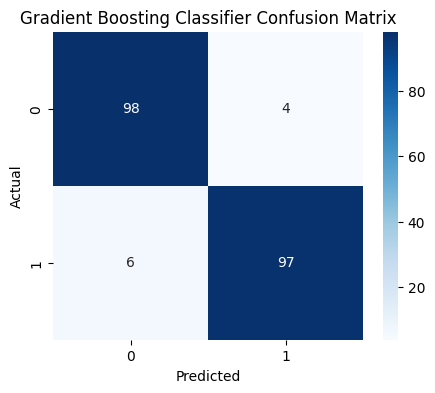

In [43]:

print("### Gradient Boosting Classifier ###")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = GradientBoostingClassifier(random_state=42)
model.fit(X_class_train_h, y_class_train_h)
y_pred = model.predict(X_class_test_h)

print("Accuracy:", accuracy_score(y_class_test_h, y_pred))
print("Precision:", precision_score(y_class_test_h, y_pred))
print("Recall:", recall_score(y_class_test_h, y_pred))
print("F1 Score:", f1_score(y_class_test_h, y_pred))

cm = confusion_matrix(y_class_test_h, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Gradient Boosting Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### SVM ###
Accuracy: 0.8097560975609757
Precision: 0.7580645161290323
Recall: 0.912621359223301
F1 Score: 0.8281938325991189


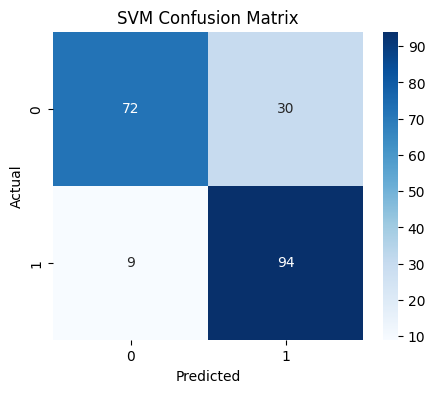

In [44]:

print("### SVM ###")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = SVC(kernel='linear', random_state=42)
model.fit(X_class_train_h, y_class_train_h)
y_pred = model.predict(X_class_test_h)

print("Accuracy:", accuracy_score(y_class_test_h, y_pred))
print("Precision:", precision_score(y_class_test_h, y_pred))
print("Recall:", recall_score(y_class_test_h, y_pred))
print("F1 Score:", f1_score(y_class_test_h, y_pred))

cm = confusion_matrix(y_class_test_h, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


 **Heart Disease Dataset - Regression Models**

### Linear Regression ###
MSE: 2.895321181118461e-30
R2 Score: 1.0


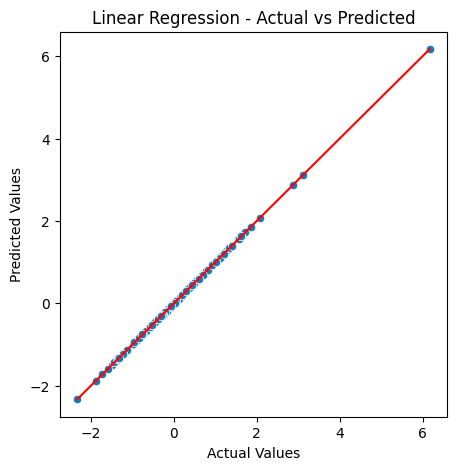

In [45]:

from sklearn.model_selection import train_test_split

# Use all columns except 'chol' and 'target' as features, and 'chol' as target
X_reg_heart = df_heart.drop(['chol', 'target'], axis=1)
y_reg_heart = df_heart['chol']

X_reg_train_h, X_reg_test_h, y_reg_train_h, y_reg_test_h = train_test_split(
    X_reg_heart, y_reg_heart, test_size=0.2, random_state=42
)

print("### Linear Regression ###")
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

model = LinearRegression()
model.fit(X_reg_train_h, y_reg_train_h)
y_pred = model.predict(X_reg_test_h)

print("MSE:", mean_squared_error(y_reg_test_h, y_pred))
print("R2 Score:", r2_score(y_reg_test_h, y_pred))

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_reg_test_h, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression - Actual vs Predicted")
plt.plot([min(y_reg_test_h), max(y_reg_test_h)], [min(y_reg_test_h), max(y_reg_test_h)], color="red")
plt.show()

# Feature importance for tree-based models
if hasattr(model, "feature_importances_"):
    import numpy as np
    fi = model.feature_importances_
    plt.figure(figsize=(8,5))
    sns.barplot(x=fi, y=X_reg_train_h.columns)
    plt.title("Linear Regression Feature Importance")
    plt.show()


### KNN Regressor ###
MSE: 0.2847821636515058
R2 Score: 0.778712032139927


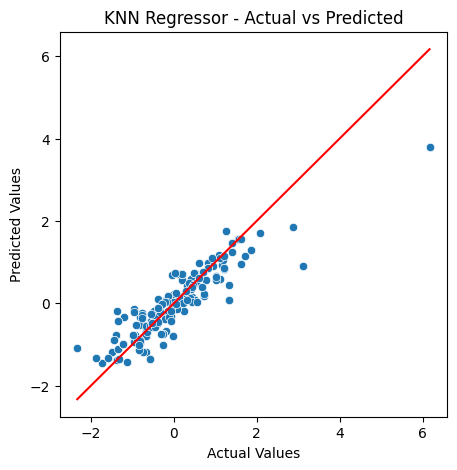

In [46]:

print("### KNN Regressor ###")
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

model = KNeighborsRegressor()
model.fit(X_reg_train_h, y_reg_train_h)
y_pred = model.predict(X_reg_test_h)

print("MSE:", mean_squared_error(y_reg_test_h, y_pred))
print("R2 Score:", r2_score(y_reg_test_h, y_pred))

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_reg_test_h, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KNN Regressor - Actual vs Predicted")
plt.plot([min(y_reg_test_h), max(y_reg_test_h)], [min(y_reg_test_h), max(y_reg_test_h)], color="red")
plt.show()


if hasattr(model, "feature_importances_"):
    import numpy as np
    fi = model.feature_importances_
    plt.figure(figsize=(8,5))
    sns.barplot(x=fi, y=X_reg_train_h.columns)
    plt.title("KNN Regressor Feature Importance")
    plt.show()


Decision Tree Regressor
MSE: 0.00045126519351205394
R2 Score: 0.9996493475702345


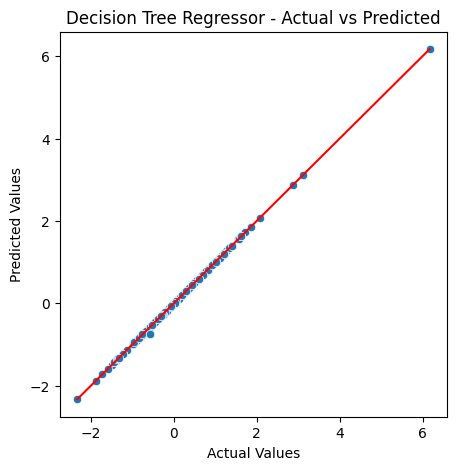

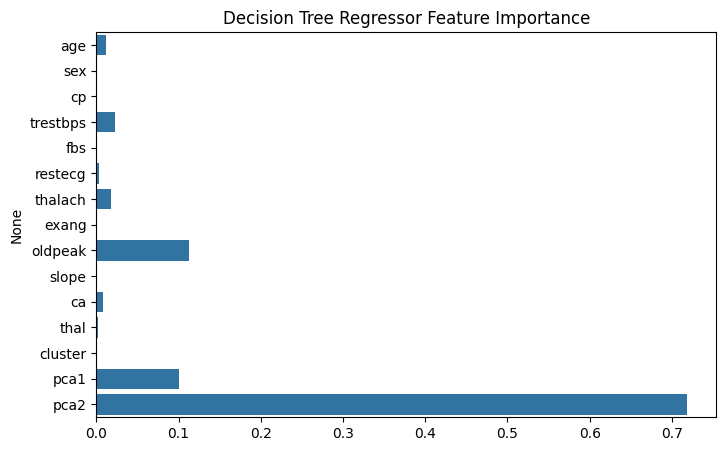

In [47]:

print("Decision Tree Regressor")
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

model = DecisionTreeRegressor(random_state=42)
model.fit(X_reg_train_h, y_reg_train_h)
y_pred = model.predict(X_reg_test_h)

print("MSE:", mean_squared_error(y_reg_test_h, y_pred))
print("R2 Score:", r2_score(y_reg_test_h, y_pred))

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_reg_test_h, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regressor - Actual vs Predicted")
plt.plot([min(y_reg_test_h), max(y_reg_test_h)], [min(y_reg_test_h), max(y_reg_test_h)], color="red")
plt.show()

if hasattr(model, "feature_importances_"):
    import numpy as np
    fi = model.feature_importances_
    plt.figure(figsize=(8,5))
    sns.barplot(x=fi, y=X_reg_train_h.columns)
    plt.title("Decision Tree Regressor Feature Importance")
    plt.show()


Random Forest Regressor
MSE: 0.02907737271936794
R2 Score: 0.97740563300287


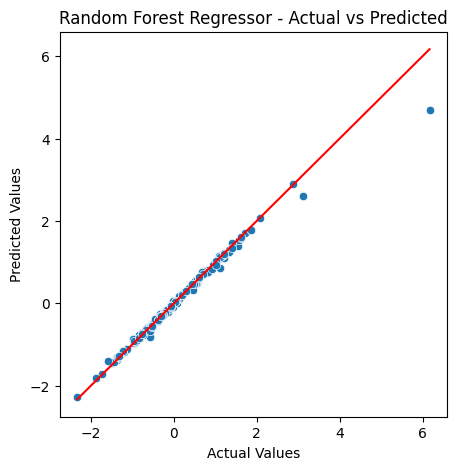

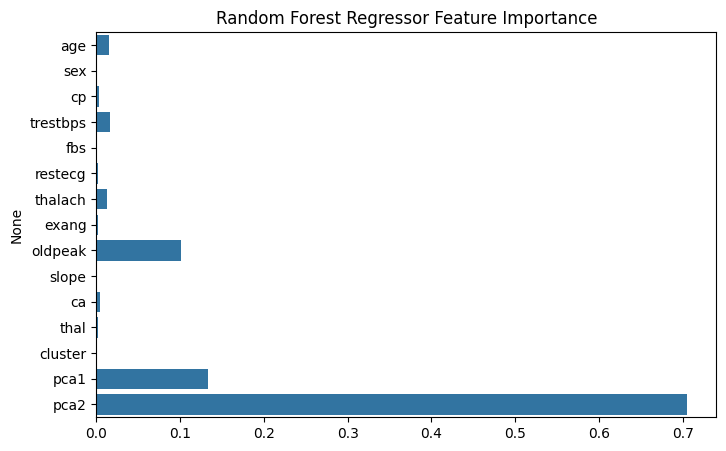

In [48]:

print("Random Forest Regressor")
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

model = RandomForestRegressor(random_state=42)
model.fit(X_reg_train_h, y_reg_train_h)
y_pred = model.predict(X_reg_test_h)

print("MSE:", mean_squared_error(y_reg_test_h, y_pred))
print("R2 Score:", r2_score(y_reg_test_h, y_pred))

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_reg_test_h, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regressor - Actual vs Predicted")
plt.plot([min(y_reg_test_h), max(y_reg_test_h)], [min(y_reg_test_h), max(y_reg_test_h)], color="red")
plt.show()

if hasattr(model, "feature_importances_"):
    import numpy as np
    fi = model.feature_importances_
    plt.figure(figsize=(8,5))
    sns.barplot(x=fi, y=X_reg_train_h.columns)
    plt.title("Random Forest Regressor Feature Importance")
    plt.show()


Gradient Boosting Regressor
MSE: 0.005593475590109398
R2 Score: 0.9956536293188469


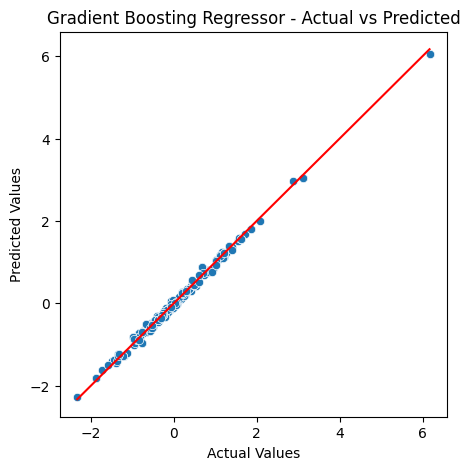

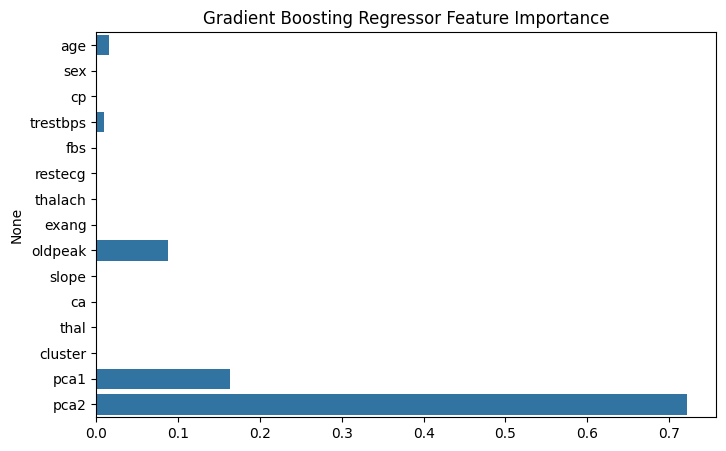

In [49]:

print("Gradient Boosting Regressor")
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

model = GradientBoostingRegressor(random_state=42)
model.fit(X_reg_train_h, y_reg_train_h)
y_pred = model.predict(X_reg_test_h)

print("MSE:", mean_squared_error(y_reg_test_h, y_pred))
print("R2 Score:", r2_score(y_reg_test_h, y_pred))

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_reg_test_h, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting Regressor - Actual vs Predicted")
plt.plot([min(y_reg_test_h), max(y_reg_test_h)], [min(y_reg_test_h), max(y_reg_test_h)], color="red")
plt.show()

if hasattr(model, "feature_importances_"):
    import numpy as np
    fi = model.feature_importances_
    plt.figure(figsize=(8,5))
    sns.barplot(x=fi, y=X_reg_train_h.columns)
    plt.title("Gradient Boosting Regressor Feature Importance")
    plt.show()


SVR
MSE: 0.1278832275942348
R2 Score: 0.9006292416812116


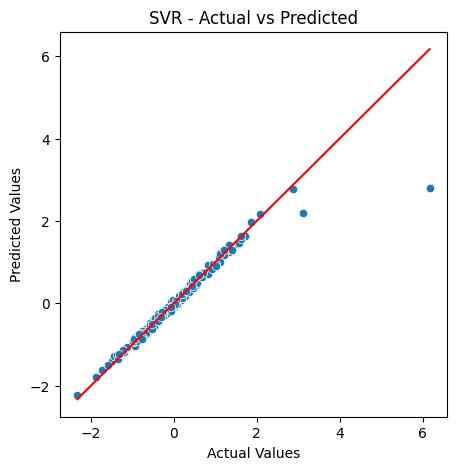

In [50]:

print("SVR")
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

model = SVR()
model.fit(X_reg_train_h, y_reg_train_h)
y_pred = model.predict(X_reg_test_h)

print("MSE:", mean_squared_error(y_reg_test_h, y_pred))
print("R2 Score:", r2_score(y_reg_test_h, y_pred))

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_reg_test_h, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR - Actual vs Predicted")
plt.plot([min(y_reg_test_h), max(y_reg_test_h)], [min(y_reg_test_h), max(y_reg_test_h)], color="red")
plt.show()


if hasattr(model, "feature_importances_"):
    import numpy as np
    fi = model.feature_importances_
    plt.figure(figsize=(8,5))
    sns.barplot(x=fi, y=X_reg_train_h.columns)
    plt.title("SVR Feature Importance")
    plt.show()


 **Diabetes Dataset - Classification Models**

Logistic Regression
Accuracy: 0.7662337662337663
Precision: 0.6792452830188679
Recall: 0.6545454545454545
F1 Score: 0.6666666666666666


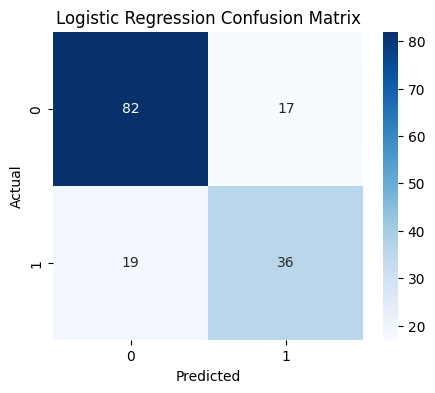

In [51]:

# Prepare features and target for diabetes classification
X_class_pima = df_pima.drop('Outcome', axis=1)
y_class_pima = df_pima['Outcome']
X_class_train_d, X_class_test_d, y_class_train_d, y_class_test_d = train_test_split(
	X_class_pima, y_class_pima, test_size=0.2, random_state=42
)

print("Logistic Regression")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_class_train_d, y_class_train_d)
y_pred = model.predict(X_class_test_d)

print("Accuracy:", accuracy_score(y_class_test_d, y_pred))
print("Precision:", precision_score(y_class_test_d, y_pred))
print("Recall:", recall_score(y_class_test_d, y_pred))
print("F1 Score:", f1_score(y_class_test_d, y_pred))

cm = confusion_matrix(y_class_test_d, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


KNN Classifier


Accuracy: 0.7597402597402597
Precision: 0.6551724137931034
Recall: 0.6909090909090909
F1 Score: 0.672566371681416


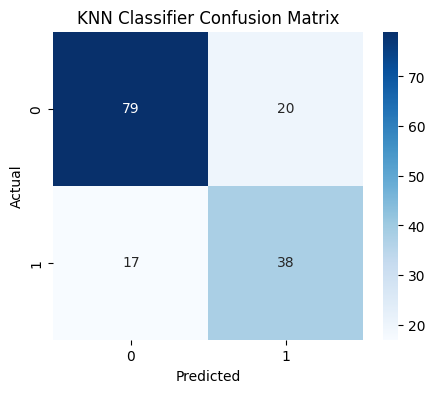

In [52]:

print("KNN Classifier")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = KNeighborsClassifier()
model.fit(X_class_train_d, y_class_train_d)
y_pred = model.predict(X_class_test_d)

print("Accuracy:", accuracy_score(y_class_test_d, y_pred))
print("Precision:", precision_score(y_class_test_d, y_pred))
print("Recall:", recall_score(y_class_test_d, y_pred))
print("F1 Score:", f1_score(y_class_test_d, y_pred))

cm = confusion_matrix(y_class_test_d, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("KNN Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Decision Tree Classifier
Accuracy: 0.6883116883116883
Precision: 0.5555555555555556
Recall: 0.6363636363636364
F1 Score: 0.5932203389830508


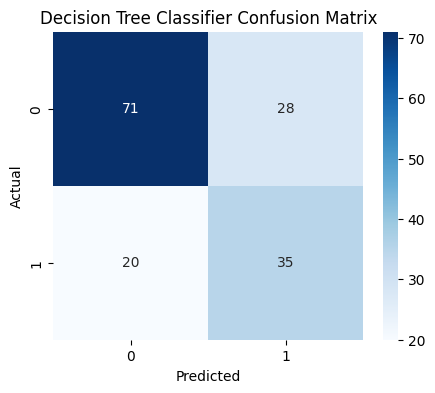

In [53]:

print("Decision Tree Classifier")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(random_state=42)
model.fit(X_class_train_d, y_class_train_d)
y_pred = model.predict(X_class_test_d)

print("Accuracy:", accuracy_score(y_class_test_d, y_pred))
print("Precision:", precision_score(y_class_test_d, y_pred))
print("Recall:", recall_score(y_class_test_d, y_pred))
print("F1 Score:", f1_score(y_class_test_d, y_pred))

cm = confusion_matrix(y_class_test_d, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest Classifier
Accuracy: 0.7597402597402597
Precision: 0.6451612903225806
Recall: 0.7272727272727273
F1 Score: 0.6837606837606838


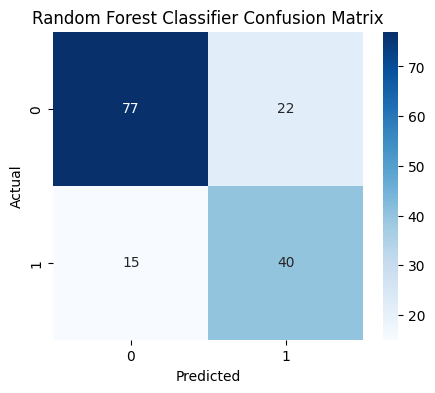

In [54]:

print("Random Forest Classifier")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = RandomForestClassifier(random_state=42)
model.fit(X_class_train_d, y_class_train_d)
y_pred = model.predict(X_class_test_d)

print("Accuracy:", accuracy_score(y_class_test_d, y_pred))
print("Precision:", precision_score(y_class_test_d, y_pred))
print("Recall:", recall_score(y_class_test_d, y_pred))
print("F1 Score:", f1_score(y_class_test_d, y_pred))

cm = confusion_matrix(y_class_test_d, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Gradient Boosting Classifier
Accuracy: 0.7532467532467533
Precision: 0.6349206349206349
Recall: 0.7272727272727273
F1 Score: 0.6779661016949152


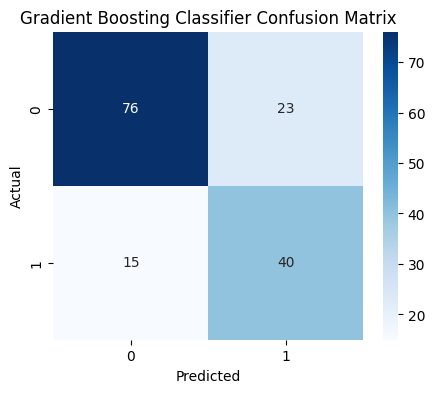

In [55]:

print("Gradient Boosting Classifier")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = GradientBoostingClassifier(random_state=42)
model.fit(X_class_train_d, y_class_train_d)
y_pred = model.predict(X_class_test_d)

print("Accuracy:", accuracy_score(y_class_test_d, y_pred))
print("Precision:", precision_score(y_class_test_d, y_pred))
print("Recall:", recall_score(y_class_test_d, y_pred))
print("F1 Score:", f1_score(y_class_test_d, y_pred))

cm = confusion_matrix(y_class_test_d, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Gradient Boosting Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


SVM
Accuracy: 0.7012987012987013
Precision: 0.5671641791044776
Recall: 0.6909090909090909
F1 Score: 0.6229508196721312


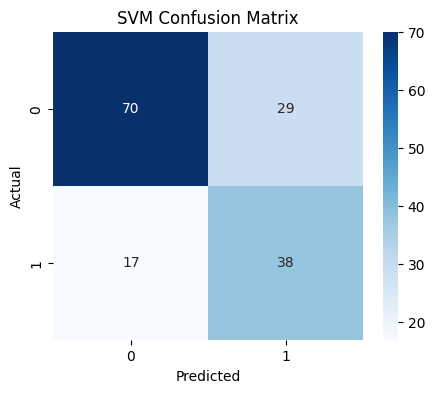

In [56]:

print("SVM")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = SVC(kernel='linear', random_state=42)
model.fit(X_class_train_d, y_class_train_d)
y_pred = model.predict(X_class_test_d)

print("Accuracy:", accuracy_score(y_class_test_d, y_pred))
print("Precision:", precision_score(y_class_test_d, y_pred))
print("Recall:", recall_score(y_class_test_d, y_pred))
print("F1 Score:", f1_score(y_class_test_d, y_pred))

cm = confusion_matrix(y_class_test_d, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Diabetes Dataset - Regression Models**

Linear Regression
MSE: 3.7290896906345954e-30
R2 Score: 1.0


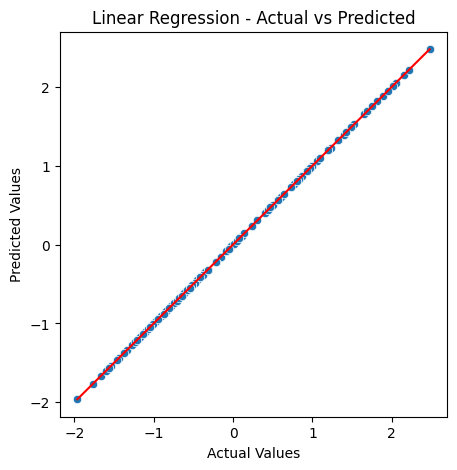

In [57]:

# Use all columns except 'Glucose' and 'Outcome' as features, and 'Glucose' as target for regression
from sklearn.model_selection import train_test_split

X_reg_pima = df_pima.drop(['Glucose', 'Outcome'], axis=1)
y_reg_pima = df_pima['Glucose']

X_reg_train_d, X_reg_test_d, y_reg_train_d, y_reg_test_d = train_test_split(
    X_reg_pima, y_reg_pima, test_size=0.2, random_state=42
)

print("Linear Regression")
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

model = LinearRegression()
model.fit(X_reg_train_d, y_reg_train_d)
y_pred = model.predict(X_reg_test_d)

print("MSE:", mean_squared_error(y_reg_test_d, y_pred))
print("R2 Score:", r2_score(y_reg_test_d, y_pred))

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_reg_test_d, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression - Actual vs Predicted")
plt.plot([min(y_reg_test_d), max(y_reg_test_d)], [min(y_reg_test_d), max(y_reg_test_d)], color="red")
plt.show()


if hasattr(model, "feature_importances_"):
    import numpy as np
    fi = model.feature_importances_
    plt.figure(figsize=(8,5))
    sns.barplot(x=fi, y=X_reg_train_d.columns)
    plt.title("Linear Regression Feature Importance")
    plt.show()


KNN Regressor
MSE: 0.3601352851679662
R2 Score: 0.6688621324127121


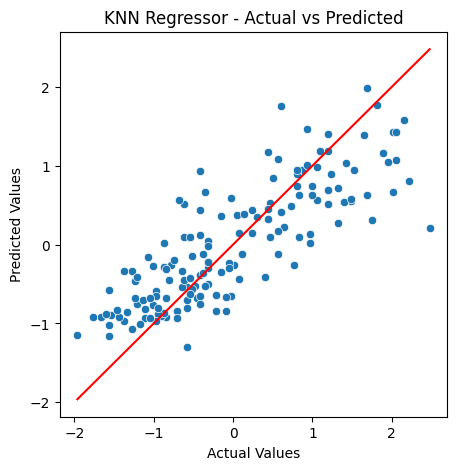

In [58]:

print("KNN Regressor")
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

model = KNeighborsRegressor()
model.fit(X_reg_train_d, y_reg_train_d)
y_pred = model.predict(X_reg_test_d)

print("MSE:", mean_squared_error(y_reg_test_d, y_pred))
print("R2 Score:", r2_score(y_reg_test_d, y_pred))

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_reg_test_d, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KNN Regressor - Actual vs Predicted")
plt.plot([min(y_reg_test_d), max(y_reg_test_d)], [min(y_reg_test_d), max(y_reg_test_d)], color="red")
plt.show()


if hasattr(model, "feature_importances_"):
    import numpy as np
    fi = model.feature_importances_
    plt.figure(figsize=(8,5))
    sns.barplot(x=fi, y=X_reg_train_d.columns)
    plt.title("KNN Regressor Feature Importance")
    plt.show()


Decision Tree Regressor
MSE: 0.19529303208245702
R2 Score: 0.8204315965088531


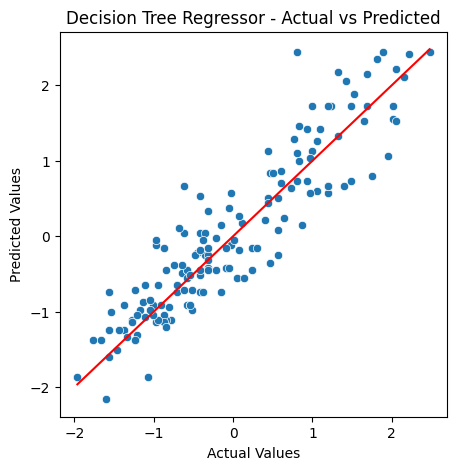

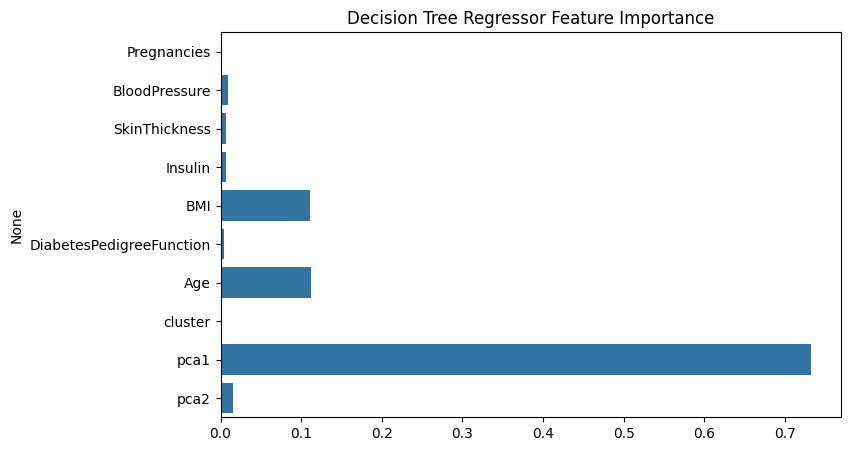

In [59]:

print("Decision Tree Regressor")
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

model = DecisionTreeRegressor(random_state=42)
model.fit(X_reg_train_d, y_reg_train_d)
y_pred = model.predict(X_reg_test_d)

print("MSE:", mean_squared_error(y_reg_test_d, y_pred))
print("R2 Score:", r2_score(y_reg_test_d, y_pred))

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_reg_test_d, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regressor - Actual vs Predicted")
plt.plot([min(y_reg_test_d), max(y_reg_test_d)], [min(y_reg_test_d), max(y_reg_test_d)], color="red")
plt.show()


if hasattr(model, "feature_importances_"):
    import numpy as np
    fi = model.feature_importances_
    plt.figure(figsize=(8,5))
    sns.barplot(x=fi, y=X_reg_train_d.columns)
    plt.title("Decision Tree Regressor Feature Importance")
    plt.show()


### Random Forest Regressor ###
MSE: 0.1319847169521953
R2 Score: 0.8786424448654684


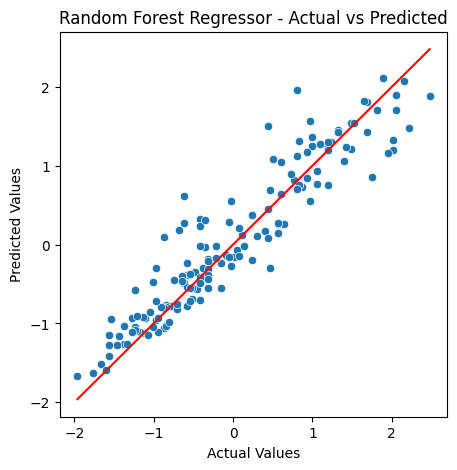

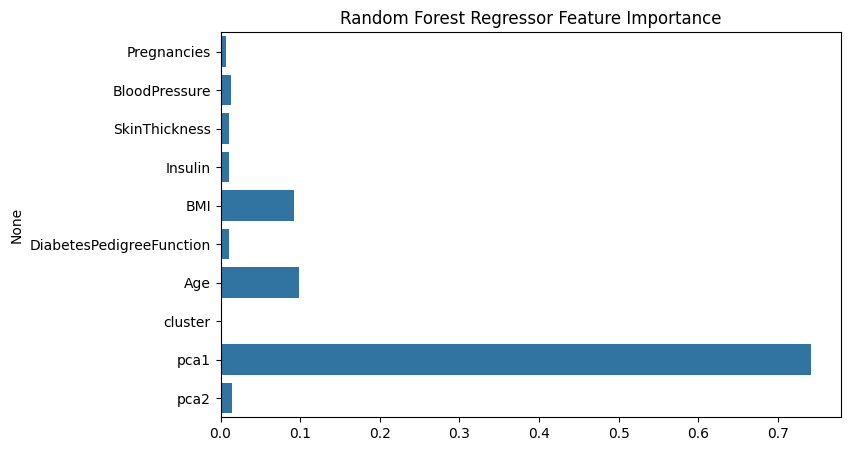

In [60]:

print("### Random Forest Regressor ###")
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

model = RandomForestRegressor(random_state=42)
model.fit(X_reg_train_d, y_reg_train_d)
y_pred = model.predict(X_reg_test_d)

print("MSE:", mean_squared_error(y_reg_test_d, y_pred))
print("R2 Score:", r2_score(y_reg_test_d, y_pred))

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_reg_test_d, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regressor - Actual vs Predicted")
plt.plot([min(y_reg_test_d), max(y_reg_test_d)], [min(y_reg_test_d), max(y_reg_test_d)], color="red")
plt.show()


if hasattr(model, "feature_importances_"):
    import numpy as np
    fi = model.feature_importances_
    plt.figure(figsize=(8,5))
    sns.barplot(x=fi, y=X_reg_train_d.columns)
    plt.title("Random Forest Regressor Feature Importance")
    plt.show()


### Gradient Boosting Regressor ###
MSE: 0.07268134407294136
R2 Score: 0.9331708214082196


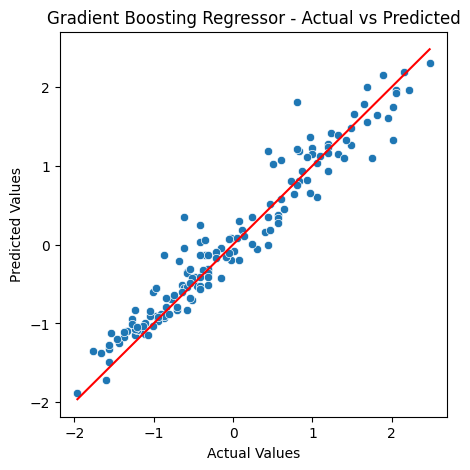

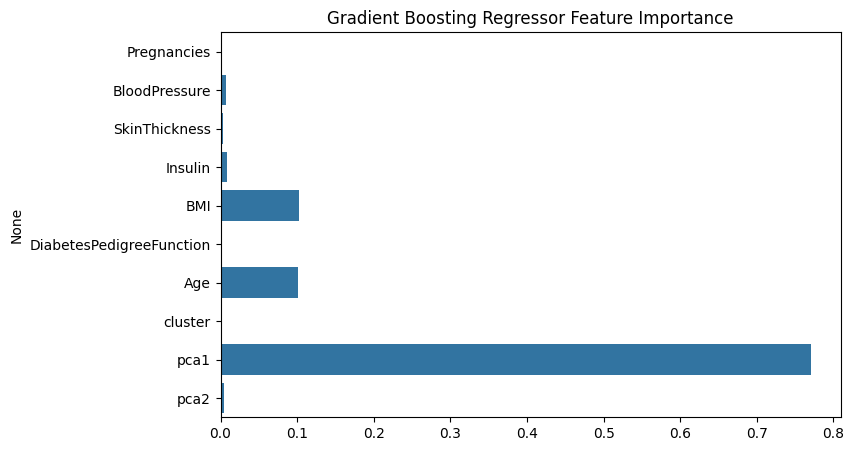

In [61]:

print("### Gradient Boosting Regressor ###")
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

model = GradientBoostingRegressor(random_state=42)
model.fit(X_reg_train_d, y_reg_train_d)
y_pred = model.predict(X_reg_test_d)

print("MSE:", mean_squared_error(y_reg_test_d, y_pred))
print("R2 Score:", r2_score(y_reg_test_d, y_pred))

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_reg_test_d, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting Regressor - Actual vs Predicted")
plt.plot([min(y_reg_test_d), max(y_reg_test_d)], [min(y_reg_test_d), max(y_reg_test_d)], color="red")
plt.show()


if hasattr(model, "feature_importances_"):
    import numpy as np
    fi = model.feature_importances_
    plt.figure(figsize=(8,5))
    sns.barplot(x=fi, y=X_reg_train_d.columns)
    plt.title("Gradient Boosting Regressor Feature Importance")
    plt.show()


### SVR ###
MSE: 0.07165195935319234
R2 Score: 0.9341173220013665


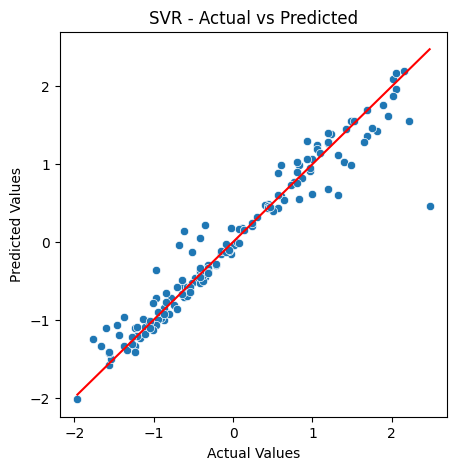

In [62]:

print("### SVR ###")
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

model = SVR()
model.fit(X_reg_train_d, y_reg_train_d)
y_pred = model.predict(X_reg_test_d)

print("MSE:", mean_squared_error(y_reg_test_d, y_pred))
print("R2 Score:", r2_score(y_reg_test_d, y_pred))

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_reg_test_d, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR - Actual vs Predicted")
plt.plot([min(y_reg_test_d), max(y_reg_test_d)], [min(y_reg_test_d), max(y_reg_test_d)], color="red")
plt.show()


if hasattr(model, "feature_importances_"):
    import numpy as np
    fi = model.feature_importances_
    plt.figure(figsize=(8,5))
    sns.barplot(x=fi, y=X_reg_train_d.columns)
    plt.title("SVR Feature Importance")
    plt.show()
